[0]	validation_0-mlogloss:0.94030	validation_1-mlogloss:0.94231
[1]	validation_0-mlogloss:0.84400	validation_1-mlogloss:0.84768
[2]	validation_0-mlogloss:0.78030	validation_1-mlogloss:0.78513


/Users/dtheod/Library/Caches/pypoetry/virtualenvs/salary-prediction-e5IJy_fq-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-mlogloss:0.73232	validation_1-mlogloss:0.73838
[4]	validation_0-mlogloss:0.69694	validation_1-mlogloss:0.70433
[5]	validation_0-mlogloss:0.67009	validation_1-mlogloss:0.67822
[6]	validation_0-mlogloss:0.64487	validation_1-mlogloss:0.65440
[7]	validation_0-mlogloss:0.62502	validation_1-mlogloss:0.63595
[8]	validation_0-mlogloss:0.61053	validation_1-mlogloss:0.62282
[9]	validation_0-mlogloss:0.59553	validation_1-mlogloss:0.61004
[10]	validation_0-mlogloss:0.58226	validation_1-mlogloss:0.59842
[11]	validation_0-mlogloss:0.57174	validation_1-mlogloss:0.58899
[12]	validation_0-mlogloss:0.56232	validation_1-mlogloss:0.58111
[13]	validation_0-mlogloss:0.55468	validation_1-mlogloss:0.57395
[14]	validation_0-mlogloss:0.54799	validation_1-mlogloss:0.56815
[15]	validation_0-mlogloss:0.53953	validation_1-mlogloss:0.56146
[16]	validation_0-mlogloss:0.53416	validation_1-mlogloss:0.55701
[17]	validation_0-mlogloss:0.52740	validation_1-mlogloss:0.55141
[18]	validation_0-mlogloss:0.523

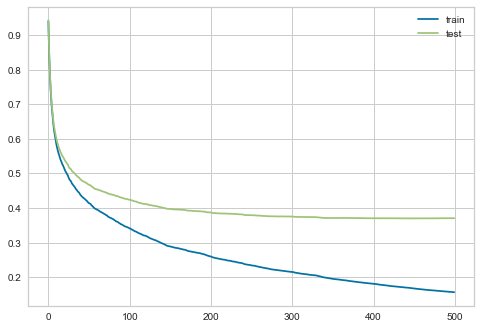

In [235]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

# Load a classification dataset
X, y = load_game()

# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# define the model
model = XGBClassifier(n_estimators=500)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='mlogloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['mlogloss'], label='train')
pyplot.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()